# Обработка текстов на примере задачи анализа тональности отзывов

В первой части занятия мы займемся обучением классификатора на текстах. С категориальными данными мы уже встерчались и активно работали, но наши данные содержали числовые признаки. В этот раз даны радикально другие данные, по которым мы будем учить уже знакомые классификаторы!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '/Users/elentevanyan/documents_personal/teaching/datasets/Restaurant_Reviews.tsv'

In [3]:
data = pd.read_csv(filename, sep = '\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


В отличие от большинства предыдущих практических работ классические действия (проверить пропуски, удалить дубли, посчитать статистики) не доступны. Чисел нет, столбцов всего два, один - таргет.Нам еще предстоит сделать признаки из имеющихся текстов. Мы познакомимся с двумя подходами:
- Модель мешка слов (bag of words) 
- TF-IDF

На самом деле, TF-IDF - улучшние модели мешка слов. Но прежде чем говорить об одном или другом способе, нужно обсудить предобработку текста. 

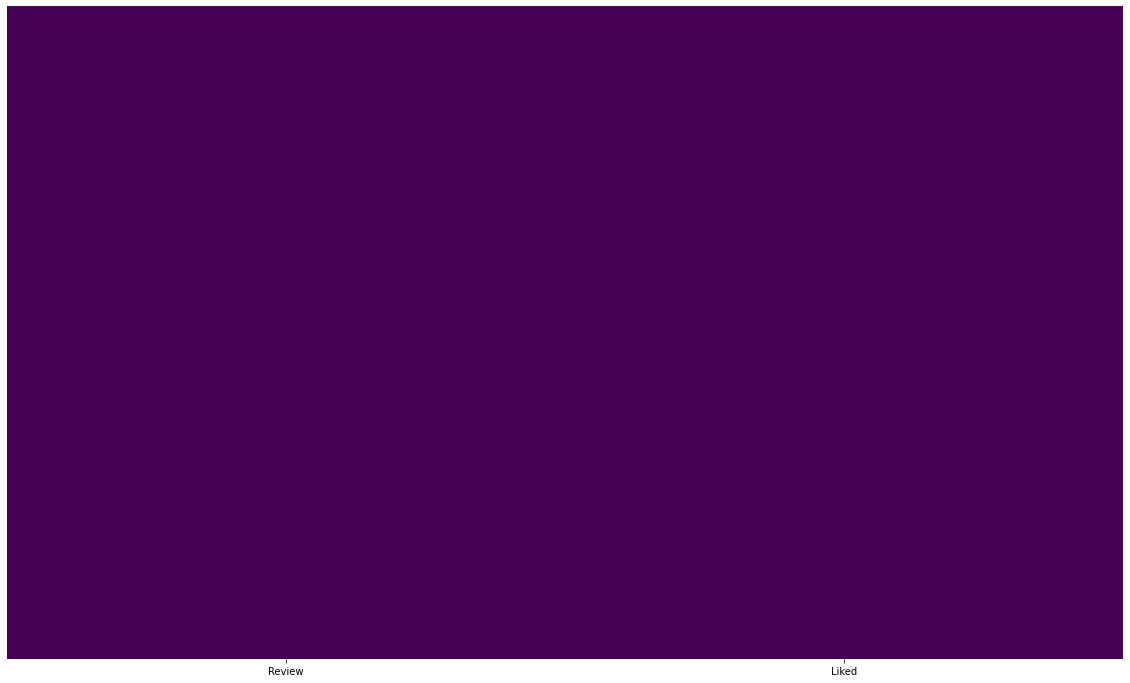

In [8]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Предобработка текста

Текст состоит из структурных единиц. Минимальная единица, которая обладает смыслов - это слово. Поэтому предобработка состоит из двух этапов:

1) **Токенизация**: выделение отдельных слов <br>
2) **Нормализация**: приведение слов к начальному виду (гуляли, гуляла, гуляю - это все формы слова "гулять")

С токенизацией вроде бы несложно: есть пробел, поделили слова.

С нормализацией есть сложности, потому что образование форм от слова может не поддаваться никакой логике и структурированию (если вы учили любой романский язык и формы глаголов во всех 16 временах, то понимаете, о чем речь). Концептуально есть два подхода:

#### Стемминг
Stemming – это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду.


#### Лемматизация 
процесс приведения слова к его нормальной форме (лемме):

- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.
Например, для русского языка есть библиотека pymorphy2.

Можно выделить третий шаг: <br> 
3) **Удаление стоп-слов**

В каждом языке есть слова, занимающие время в эфире - смысл фразы без них не изменится, а сложность анализа они увеличат, потому от них избавляются.

## Модель мешка слов

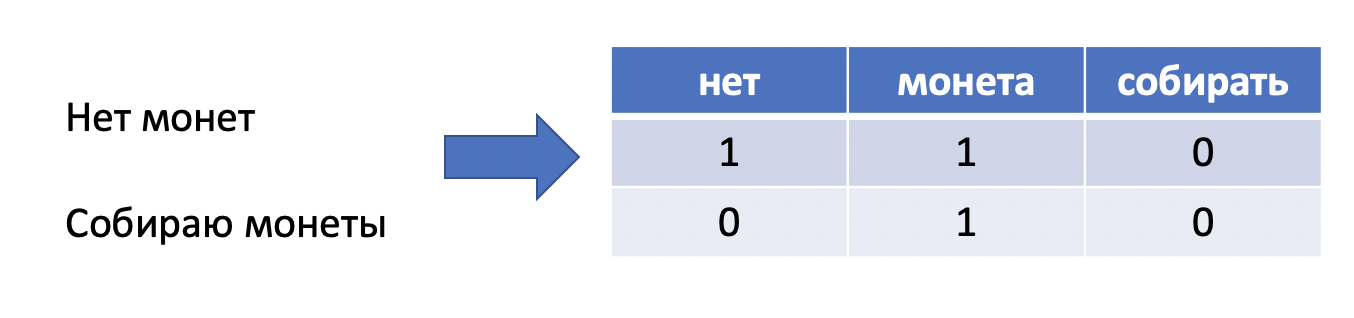

## TF-IDF

**TF** (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова $t_{{i}}$ в пределах отдельного документа.

$$ {tf} (t,d)={\frac {n_{t}}{\sum _{k}n_{k}}}$$

где $n_t$ есть число вхождений слова $t$ в документ, а в знаменателе — общее число слов в данном документе.

**IDF** (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции. Учёт IDF уменьшает вес широкоупотребительных слов. Для каждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF.

$$ (t,D)=\log {\frac {|D|}{|\{\,d_{i}\in D\mid t\in d_{i}\,\}|}}$$
где

$|D|$ — число документов в коллекции; <br>
$|\{\,d_{i}\in D\mid t\in d_{i}\,\}|$ — число документов из коллекции $D$, в которых встречается $t$ (когда $n_{t}\neq 0$). <br>
Выбор основания логарифма в формуле не имеет значения, поскольку изменение основания приводит к изменению веса каждого слова на постоянный множитель, что не влияет на соотношение весов.

Таким образом, мера TF-IDF является произведением двух сомножителей:

$$\operatorname {tf-idf} (t,d,D)=\operatorname {tf} (t,d)\times \operatorname {idf} (t,D)$$


Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах.

### Задача 1.

Сделайте токенизацию и нормализацию следующих текстов:
- Вторая волна наступит
- Сильные волны сегодня
- Сегодня второй день

### Задача 2. 

Сделайте модель мешка слов и TD-IDF для фраз из задачи 1. 

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elentevanyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Задача 3
Для каждого ревью нужно сделать токенизацизацию и нормализацию.
Результат - переменная corpus, в которой каждый объект - это нормализованные токены из каждого текста. 

Для удобства в переменную review регулярным выражением записываются через пробел все слова в тексте.
Ваша задача:
- организовать токенизацию
- сделать нормализацию слова объявленным стеммером (*ps.stem(word)* вернет нормализованное слово)
- проверить, что слово не является стоп-словом в английском языке (множество стоп-слов можно получить командой *set(stopwords.words('english'))*
- объединить слова из одного review в один текст через пробел (т.к. через шаг вызовем модель мешка слов, тексты нужны в таком формате)

In [14]:
    ps = PorterStemmer()


In [17]:
temp = [ps.stem(word) for word in data.Review[0].lower().split() if not word in set(stopwords.words('english'))]

In [19]:
corpus = []
for i in range(0, data['Review'].shape[0]):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
bagwords = CountVectorizer()
X_bag = bagwords.fit_transform(corpus)

In [27]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)

###  Задача 4.
Обучите логистическую регрессию на обоих вариантах обработки текстов. Рассчитайте значение accuracy.
Какая из моделей лучше?

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
X_bag_train, X_bag_test, y_bag_train, y_bag_test = train_test_split(X_bag, data['Liked'],
                                                                    test_size=0.2,
                                                                    shuffle=True)

In [31]:
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tfidf, data['Liked'],
                                                                    test_size=0.2,
                                                                    shuffle=True)

In [32]:
lr_bag = LogisticRegression()
lr_bag.fit(X_bag_train, y_bag_train)
y_pred_bag = lr_bag.predict(X_bag_test)
print(accuracy_score(y_bag_test, y_pred_bag))

0.775


In [33]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_tf_train, y_tf_train)
y_pred_tfidf = lr_bag.predict(X_tf_test)
print(accuracy_score(y_tf_test, y_pred_tfidf))

0.955


In [34]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

###  Задача 5.
Проверьте обобщающую способность лучшей модели из задачи 4 кросс-валидацией на 3 фолдах

In [35]:
from sklearn.model_selection import cross_validate

In [36]:
model = LogisticRegression()

In [41]:
cross_validate(model, X_tfidf, data['Liked'], cv=5, scoring='accuracy')

{'fit_time': array([0.03098321, 0.01363993, 0.01238799, 0.01033235, 0.00939608]),
 'score_time': array([0.00090766, 0.00042486, 0.00040603, 0.00033379, 0.0003798 ]),
 'test_score': array([0.73, 0.76, 0.75, 0.78, 0.79])}

In [42]:
cross_validate(model, X_bag, data['Liked'], cv=5, scoring='accuracy')

{'fit_time': array([0.01753902, 0.0177958 , 0.01779985, 0.01457596, 0.01363492]),
 'score_time': array([0.00040817, 0.00036597, 0.00041914, 0.0003562 , 0.00035787]),
 'test_score': array([0.74, 0.75, 0.73, 0.81, 0.8 ])}